In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense ,Conv2D , MaxPooling2D , Flatten , Dropout ,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Loading Datasets and divide into Train and Test 

### Two ways 
    1. with load_data()
    2. by downloading .npz   downlaod-link = https://www.kaggle.com/datasets/vikramtiwari/mnist-numpy()



In [2]:
# loading data with keras builtin method load_data() - https://keras.io/api/datasets/mnist/#load_data-function (check for reference)

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# here (10000,) doesnt have pixel valuelike 28,28 in train dataset because it is a 1-d list of labels of 0-9 digits 
print(f"X_train shape {x_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"x_test shape {x_test.shape}")
print(f"y_test shape {y_test.shape} ")

print('\n')

# printing the dimensions of each case
print(f"dimension of x_train is : {np.ndim(x_train)}-D")
print(f"dimension of y_train is : {np.ndim(y_train)}-D")
print(f"dimension of x_test  is : {np.ndim(x_test)}-D")
print(f"dimension of y_test  is : {np.ndim(y_test)}-D")


X_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,) 


dimension of x_train is : 3-D
dimension of y_train is : 1-D
dimension of x_test  is : 3-D
dimension of y_test  is : 1-D


In [3]:
# laod dataset through dwnloading .npz file of mnist dataset

dataset_path = 'C:/Users/DELL/Downloads/mnist.npz'
data = np.load(dataset_path)       # np.load loads  pickel/.npz/.npy file format and return dictionary 

# The .npz file usually contains multiple arrays. You need to know the keys associated with each array.
# You can print all available keys to know what data is inside the .npz file
print(f"all keys of datasets are : {data.files} \n")

# Assuming the keys are ['x_test', 'x_train', 'y_train', 'y_test']
x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']


print(f"X_train shape {x_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_test shape {x_test.shape}")
print(f"y_test shape {y_test.shape}")

data.close                 # close the file

all keys of datasets are : ['x_test', 'x_train', 'y_train', 'y_test'] 

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


<bound method NpzFile.close of NpzFile 'C:/Users/DELL/Downloads/mnist.npz' with keys: x_test, x_train, y_train, y_test>

# Visualize the Dataset image

### Single image visualization with image information like - 
1. total no of image in data
2. Dimension and Height-Width of single image
3. channel of image

Total number of images: 60000
Dimensions of each image: 28 x 28
Number of channels per image: 1
Dimension of the whole dataset: 3-D
Dimension of this image: 2-D
Raw matrix of this image:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0

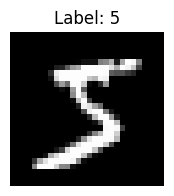

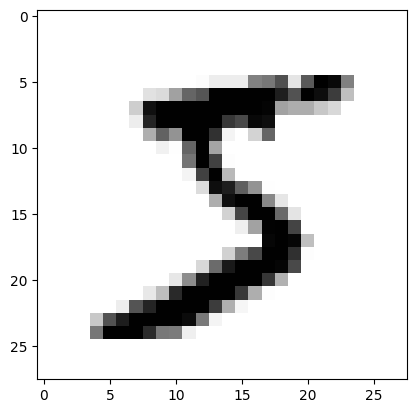

In [4]:
# function to visualize and extract out informastion related to dataset and image

def single_image_information(npz_file_path, image_index):
    # Load the dataset that is in dictionary format
    dataset = np.load(npz_file_path)
    x_train = dataset['x_train']
    y_train = dataset['y_train']
    
    # Get the image and label
    image = x_train[image_index]            # extracting out single image metrics by its indexing no
    label = y_train[image_index]

    # Determine the dataset dimensions
    num_images, image_height, image_width = x_train.shape       
    num_channels = x_train.shape[3] if len(x_train.shape) == 4 else 1

    # Display information about the dataset
    print(f"Total number of images: {num_images}")
    print(f"Dimensions of each image: {image_height} x {image_width}")
    print(f"Number of channels per image: {num_channels}")
    print(f"Dimension of the whole dataset: {x_train.ndim}-D")
    print(f"Dimension of this image: {image.ndim}-D")
    print(f"Raw matrix of this image:\n{image}")

    # Plotting
    plt.figure(figsize=(2, 2))
    plt.title(f'Label: {label}')
    plt.axis('off')
    plt.imshow(image, cmap='gray')     
    plt.show()     
    plt.imshow(image, cmap=plt.cm.binary)           

# Example usage
npz_file_path = 'C:/Users/DELL/Downloads/mnist.npz'
image_index = 0
single_image_information(npz_file_path, image_index)


### Multiple image visualization

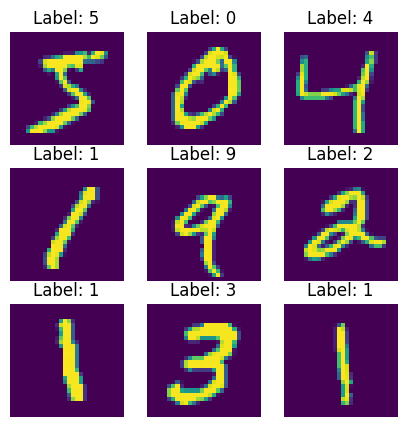

<bound method NpzFile.close of NpzFile 'C:/Users/DELL/Downloads/mnist.npz' with keys: x_test, x_train, y_train, y_test>

In [5]:
def plot_multiple_images(images, labels, nrows, ncols):
    """Plot a grid of images with their labels."""
    fig, axes = plt.subplots(nrows, ncols  , figsize=(5,5))
    for i, ax in enumerate(axes.flat):
        # print(i,ax)               #printing all 9 index and axes location
        # print(axes.flat)
        if i < len(images):
            ax.imshow(images[i])
            ax.set_title(f"Label: {labels[i]}")
            ax.axis('off')  # Turn off axis numbers and ticks
    plt.show()


# Show 9 images from the dataset
npz_file_path = 'C:/Users/DELL/Downloads/mnist.npz'    
all_data = np.load(npz_file_path) #loading the dataset 
x_train = all_data['x_train']
y_train = all_data['y_train']

plot_multiple_images(x_train, y_train, 3, 3)     #calling function for plotting multiple image
data.close

# Making a Full Cnn Model using convolution layer , pooling layer

In [ ]:
# Reshape and normalize the data and divide by 255 to make pixel value into the 0 to 1 range
x_train = x_train.reshape(-1,28, 28, 1).astype('float32') / 255        # -1 is batch size used to autodetect no of total images inside dataset
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255


# One-hot encode the labels
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)


# Define the model architecture
model = Sequential([
    Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),             # this layer takes input type = (height,width,channel)
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),

    Flatten(),          # flatten data to give as an input for dense layer because dense layer takes 1-D input

    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Use a data generator for managing memory effectively
datagen = ImageDataGenerator()
train_generator = datagen.flow(x_train, y_train, batch_size=64)
validation_generator = datagen.flow(x_test, y_test, batch_size=64)

# Train the model using a generator
model.fit(train_generator, epochs=10, validation_data=validation_generator)

#saving the model
# model.save('new_model.h5')

# Function for Image Processing

##### this process_image() function takes the input image from continuous streaming and make ready this frame as model takes input 

In [6]:
def preprocess_image(image):
    """
    Preprocess the input image for digit recognition model.

    Parameters:
    image (numpy.ndarray): The input image captured from the webcam or any other source.

    Returns:
    numpy.ndarray: The preprocessed image ready to be fed into the CNN model.
    """
    # Resize the image to the target size of (28, 28), which is required by the model
    resized_image = cv2.resize(image, (28, 28))

    # Convert the color image from RGB to Grayscale format as the model expects a single channel input
    grayscale_image = cv2.cvtColor(resized_image, cv2.COLOR_RGB2GRAY)

    # Normalize the grayscale image by converting pixel value range from 0-255 to 0-1
    normalized_image = grayscale_image.astype('float32') / 255

    # Reshape the image to add a 'channel' dimension since the model expects input shape (28, 28, 1)
    reshaped_image = normalized_image.reshape(28, 28, 1)

    # Expand dimensions to add the 'batch' dimension at the start as the model expects input shape (batch_size, 28, 28, 1)
    final_image = np.expand_dims(reshaped_image, axis=0)

    return final_image


# Starting Continuous Stream from PC Camera Using OpenCv

In [7]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the previously trained model

model = load_model('C:/Users/DELL/Desktop/projects/handDigit_Recognition/new_model.h5')

# Initialize webcam
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    # frame = cv2.flip(frame, 1)

    if not ret:
        break  # If no frame is captured, break out of the loop

     # Define the coordinates and dimensions for the ROI
    x_cord, y_cord, width, height = 250, 150, 150, 150

    # Extract the ROI
    roi = frame[y_cord:y_cord+height, x_cord:x_cord+width].copy()

    # process the input image    
    input_img = preprocess_image(roi)

    # Make predictions
    prediction = model.predict(input_img)
    predicted_class = np.argmax(prediction)

    # Display the predictions
    label = f'Predicted Digit: {predicted_class}'
    cv2.putText(frame, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA) 
    cv2.rectangle(frame, (x_cord, y_cord), (x_cord + width, y_cord + height), (0, 0, 0), 5)
   
    # Display the resulting frame
    cv2.imshow('Digit Recognition', frame)
    cv2.imshow('Extracted ROI Image', roi)

    # Break the loop when 'q' is pressed
    if cv2.waitKey(100) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━